# Домашнее задание №7

###### В данной работе в качестве датасета рассматривается статистика игр NBA. Датасет состоит из трех таблиц, содержащих антропологические данные игроков, даты рождения, начала и окончания спортивной карьеры, принадлежность к учебному заведению, игровую позицию на площадке, а так же статистику по сезонам и играм команд, включая забитые игроками мячи и результативные передачи.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Seasons_Stats.csv')
Seasons_Stats = pd.read_csv('Seasons_Stats.csv')

###### Задаине №1. График показывает общую динамику результативности матчей по сезонам

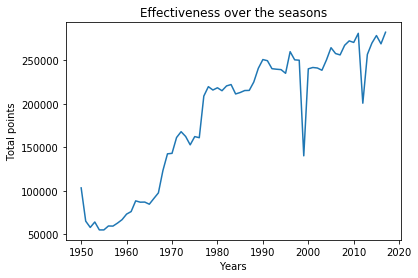

In [2]:
df.groupby(['Year']).sum()['PTS'].plot()
plt.xlabel('Years')
plt.ylabel('Total points')
plt.title('Effectiveness over the seasons')
plt.show()

###### Задание №2. Данная визуализация показывает развитие карьеры игроков, набравших более 30000 очков. По данным графикам можно оценить как общий возрастной показатель так называемого пика формы спортсмена, так и индивидуальные показатели результативности спортсмена взависимости от возраста. 

In [3]:
players = pd.read_csv('Players.csv')
Seasons_Stats.loc[:,('Year', 'Player')].head(10)

,Year,Player
0,1950.0,Curly Armstrong
1,1950.0,Cliff Barker
2,1950.0,Leo Barnhorst
3,1950.0,Ed Bartels
4,1950.0,Ed Bartels
5,1950.0,Ed Bartels
6,1950.0,Ralph Beard
7,1950.0,Gene Berce
8,1950.0,Charlie Black
9,1950.0,Charlie Black


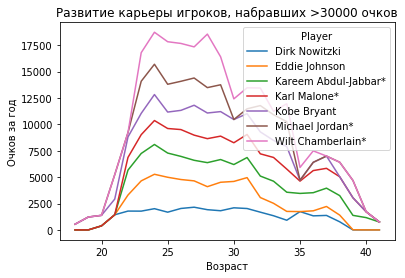

In [4]:
df1=df.loc[:,('Player','Age','PTS')]
df2 = df[df.PTS.groupby(df.Player).transform('sum') > 30000]
lst = df2.Player.unique()
df3 = df.loc[df['Player'].isin(lst)]
df3.groupby(['Age','Player'])['PTS'].sum().unstack().plot(kind='line',stacked=True)
plt.xlabel('Возраст')
plt.ylabel('Очков за год')
plt.title('Развитие карьеры игроков, набравших >30000 очков')
plt.show()

In [5]:
df3=df.loc[~df['Player'].isin(df2['Player'])]
df2=df.groupby(['Player'])['PTS'].aggregate('sum').sort_values(ascending=False).head(10)
df2 = df[df.PTS.groupby(df.Player).transform('sum') > 34000]

In [118]:
df4=df.groupby(['Player'])['3P'].aggregate('sum').sort_values(ascending=False).head(10)
df4.head(100)

Player
Ray Allen           3174.0
Reggie Miller*      2560.0
Kyle Korver         2322.0
Vince Carter        2292.0
Tim Hardaway        2251.0
Chauncey Billups    2245.0
Jason Terry         2242.0
Jamal Crawford      2191.0
Jason Kidd          2168.0
Paul Pierce         2143.0
Name: 3P, dtype: float64

###### Задание №3. В данной визуализации рассматриваются данные о росте игроков и количестве заброшенных мячей. График показывает корелляцию данных величин (увеличивается ли количество заброшенных мячей с увеличением роста игроков)

In [11]:
Players = pd.read_csv('Players.csv')
top_100 = Seasons_Stats.groupby('Player').sum()[['PTS']].sort_values('PTS', ascending=False).head(100)
top_100 = top_100.merge(Players, on='Player', how='left')
top_100 = top_100.merge(Seasons_Stats, on='Player', how='left')
top_100.head()

,Player,PTS_x,Unnamed: 0_x,height,weight,collage,born,birth_city,birth_state,Unnamed: 0_y,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS_y
0,Kareem Abdul-Jabbar*,38387.0,789,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York,2868,...,0.653,NaN,NaN,1190.0,337.0,NaN,NaN,NaN,283.0,2361.0
1,Kareem Abdul-Jabbar*,38387.0,789,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York,3070,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
2,Kareem Abdul-Jabbar*,38387.0,789,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York,3316,...,0.689,NaN,NaN,1346.0,370.0,NaN,NaN,NaN,235.0,2822.0
3,Kareem Abdul-Jabbar*,38387.0,789,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York,3582,...,0.713,NaN,NaN,1224.0,379.0,NaN,NaN,NaN,208.0,2292.0
4,Kareem Abdul-Jabbar*,38387.0,789,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York,3852,...,0.702,287.0,891.0,1178.0,386.0,112.0,283.0,NaN,238.0,2191.0


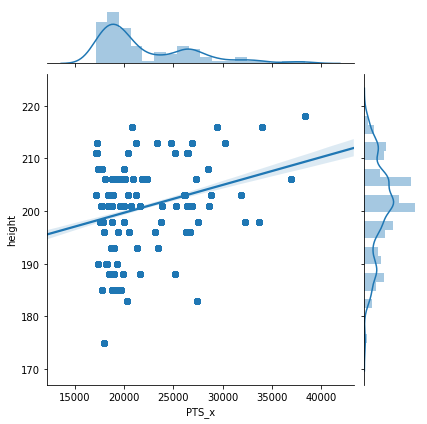

In [13]:
import seaborn as sns
sns.jointplot(x='PTS_x', y='height', 
              data=top_100, kind='reg')

###### Задание № 4. Данный график показывает главных поставщиков спортивных кадров для NBA среди учебных заведений. На графике отображено распределение игроков для первых 10-ти колледжей по количеству игроков.

In [14]:
collage_top_10 = Players.groupby(['collage'])['Player'].aggregate('count').sort_values(ascending=False).head(10)
collage_top_10.head(10)

collage
University of Kentucky                   89
University of California, Los Angeles    86
University of North Carolina             67
University of Kansas                     59
Duke University                          56
University of Notre Dame                 51
Syracuse University                      49
Indiana University                       49
St. John's University                    48
University of Louisville                 46
Name: Player, dtype: int64

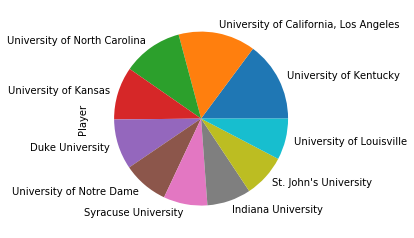

In [15]:
collage_top_10.plot(kind='pie', y='Count')

###### Задание № 5. Данный график показывает статистику игроков  NBA, родившихся в определенных штатах.

In [18]:
players = pd.read_csv('Players.csv')

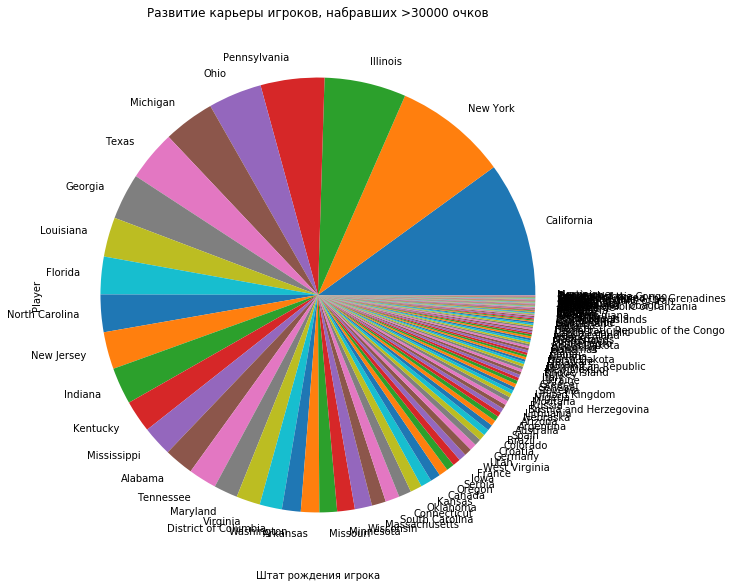

In [17]:
pl1 = players.groupby(['birth_state'])['Player'].count().sort_values(ascending=False)
pl1.plot(kind='pie', subplots=True, figsize=(100, 10))
plt.xlabel('Штат рождения игрока')
plt.title('Развитие карьеры игроков, набравших >30000 очков')
plt.show()